# IBM Applied Data Science Capstone Course by Coursera
### Week 5 Final Report
**_Opening a Açai Store in Rio de Janeiro, Brazil_**
- Build a dataframe of neighbor in Rio de Janeiro, Brazil by web scraping the data from Wikipedia page
- Get the geographical coordinates of the neighborhoods
- Obtain the venue data for the neighborhoods from Foursquare API
- Explore and cluster the neighborhoods
- Select the best cluster to open a new shopping mall
***


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image (url='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cidade_de_luz_e_cor.jpg/1350px-Cidade_de_luz_e_cor.jpg')

### 1. Import libraries

In [2]:
%pip install geopandas

import geopandas as gpds
import shapely.geometry
%pip install geopy
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
%pip install lxml
%pip install geocoder
import geocoder # to get coordinates
import pandas as pds # Para carregar a planilha com os endereços
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates
import requests
import folium
%pip install XlsxWriter
from sklearn.cluster import KMeans

     |████████████████████████████████| 931kB 10.1MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 31.9MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 36.2MB/s eta 0:00:01    |██████████▉                     | 5.0MB 11.4MB/s eta 0:00:01��███████████████▉            | 9.1MB 11.4MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 9.0MB/s eta 0:00:01
     |████████████████████████████████| 92kB 8.1MB/s  eta 0:00:01
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 122kB 6.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 5.5MB 5.2MB/s eta 0:00:01     |████████████████████████▌       | 4.2MB 5.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
     |██████████████████████

### 2. Scrap data from Wikipedia page into a DataFrame

In [3]:
df = pds.DataFrame (pds.read_html('https://pt.wikipedia.org/wiki/Lista_de_bairros_da_cidade_do_Rio_de_Janeiro')[0])

In [4]:
df

,0,1,2,3
0,Bairros oficiais,Bairros oficiais,Bairros oficiais,Bairros oficiais
1,Zona,Subprefeitura(nº de bairros),Bairros[5],Imagens
2,Central,Centro Histórico e Zona Portuária (16)[6][7],Bairro Imperial de São Cristóvão • Benfica • C...,NaN
3,Sul,Zona Sul (17)[8],Botafogo • Catete • Copacabana • Cosme Velho •...,NaN
4,Oeste,Barra da Tijuca e Baixada de Jacarepaguá (20),Anil • Barra da Tijuca • Camorim • Cidade de D...,NaN
5,Oeste,Grande Bangu (11)[9],Bangu • Campo dos Afonsos • Deodoro • Gericinó...,NaN
6,Oeste,Zona Oeste (10),Barra de Guaratiba • Campo Grande • Cosmos • G...,NaN
7,Norte,Grande Tijuca (7),Alto da Boa Vista • Andaraí • Grajaú • Maracan...,NaN
8,Norte,Grande Méier (21)[10],Abolição • Água Santa • Cachambi • Del Castilh...,NaN
9,Norte,Ilha do Governador e Zona da Leopoldina (19),Bonsucesso • Bancários • Cacuia • Cidade Unive...,NaN


In [5]:
df.to_csv('BairroRj.csv',index=False)

### 2. Organize the CSV file in Excel

In [6]:
end = pds.read_excel("./Açai/BairrosRJ.xlsx", encoding='UTF8')
end.head()
end.shape

(163, 1)

### 3. Get the geographical coordinates

In [7]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Rio de Janeiro, Brazil'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [8]:
coords = [ get_latlng(neighborhood) for neighborhood in end["Bairro"].tolist() ]

In [9]:
coords

[[-22.896509999999978, -43.18439999999998],
 [-22.897479999999973, -43.19593999999995],
 [-22.89961999999997, -43.20539999999994],
 [-22.87991999999997, -43.22217999999998],
 [-21.13689999999997, -41.67748999999998],
 [-22.91758999999996, -43.19703999999996],
 [-22.92561999999998, -43.20946999999995],
 [-22.90985999999998, -43.20007999999996],
 [-22.912269999999978, -43.20436999999998],
 [-22.900199999999927, -43.23023999999998],
 [-21.933329999999955, -42.766669999999976],
 [-22.88988999999998, -43.245619999999974],
 [-22.762539999999944, -43.10716999999994],
 [-22.91626999999994, -43.19249999999994],
 [-22.93408999999997, -43.176039999999944],
 [-22.91885999999994, -43.17703999999998],
 [-21.633329999999944, -41.683329999999955],
 [-22.93071999999995, -43.17939999999993],
 [-22.94013999999993, -43.19918999999993],
 [-22.951379999999972, -43.18412999999998],
 [-22.955769999999973, -43.19815999999997],
 [-22.952809999999943, -43.17243999999994],
 [-22.96348999999998, -43.17160999999993

In [10]:
df_rjcoords = pds.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [11]:
end['Latitude'] = df_rjcoords['Latitude']
end['Longitude'] = df_rjcoords['Longitude']

In [12]:
end

,Bairro,Latitude,Longitude
0,Saúde,-22.896510,-43.184400
1,Gamboa,-22.897480,-43.195940
2,Santo Cristo,-22.899620,-43.205400
3,Caju,-22.879920,-43.222180
4,Centro,-21.136900,-41.677490
...,...,...,...
158,Parque Colúmbia,-22.813600,-43.340800
159,Gericinó,-22.839810,-43.473570
160,Lapa,-22.910550,-43.184380
161,Vila Kennedy,-22.856780,-43.488990


In [13]:
end1=end.drop(['Latitude', 'Longitude'],axis=1)
end1

,Bairro
0,Saúde
1,Gamboa
2,Santo Cristo
3,Caju
4,Centro
...,...
158,Parque Colúmbia
159,Gericinó
160,Lapa
161,Vila Kennedy


### 4. Create a map of Rio de Janeiro with neighbors

In [14]:
address = 'Rio de Janeiro, Brazil'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Rio de Janeiro using latitude and longitude values
map_rj = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(end['Latitude'], end['Longitude'], end['Bairro']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rj)  
    
map_rj

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


### 5. Use the Foursquare API to explore the neighborhoods

In [15]:
CLIENT_ID = 'XWPVKABQQA21DUUPK21AHA1X0L0Q4YLEJN0CECM0SESWX0IB' # your Foursquare ID
CLIENT_SECRET = '3MNHLBLWC1FEKXG4EKYENPCOCX1KF0D13SPKXVYXFTBX2ER5' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 300
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XWPVKABQQA21DUUPK21AHA1X0L0Q4YLEJN0CECM0SESWX0IB
CLIENT_SECRET:3MNHLBLWC1FEKXG4EKYENPCOCX1KF0D13SPKXVYXFTBX2ER5


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pds.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
venues_df = getNearbyVenues(names=end['Bairro'],
                                   latitudes=end['Latitude'],
                                   longitudes=end['Longitude']
                                  )

Saúde
Gamboa
Santo Cristo
Caju
Centro
Catumbi
Rio Comprido
Cidade Nova
Estácio
I. de São Cristóvão
Mangueira
Benfica
Paquetá
Santa Teresa
Flamengo
Glória
Laranjeiras
Catete
Cosme Velho
Botafogo
Humaitá
Urca
Leme
Copacabana
Ipanema
Leblon
Lagoa
Jardim Botânico
Gávea
Vidigal
São Conrado
Praça da Bandeira
Tijuca
Alto da Boa Vista
Maracanã
Vila Isabel
Andaraí
Grajaú
Manguinhos
Bonsucesso
Ramos
Olaria
Penha
Penha Circular
Braz de Pina
Cordovil
Parada de Lucas
Vigário Geral
Jardim América
Higienópolis
Jacaré
Maria da Graça
Del Castilho
Inhaúma
Engenho da Rainha
Tomás Coelho
São Francisco Xavier
Rocha
Riachuelo
Sampaio
Engenho Novo
Lins de Vasconcelos
Méier
Todos os Santos
Cachambi
Engenho de Dentro
Água Santa
Encantado
Piedade
Abolição
Pilares
Vila Kosmos
Vicente de Carvalho
Vila da Penha
Vista Alegre
Irajá
Colégio
Campinho
Quintino Boacaiúva
Cavalcanti
Engenheiro Leal
Cascadura
Madureira
Vaz Lobo
Turiaçu
Rocha Miranda
Honório Gurgel
Oswaldo Cruz
Bento Ribeiro
Marechal Hermes
Ribeira
Zumbi
C

In [18]:
venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Saúde,-22.89651,-43.1844,Pedra do Sal,-22.897994,-43.185483,Historic Site
1,Saúde,-22.89651,-43.1844,YouTube Space Rio,-22.895134,-43.183175,Film Studio
2,Saúde,-22.89651,-43.1844,VLT Carioca - Estação Parada dos Museus,-22.895896,-43.182144,Tram Station
3,Saúde,-22.89651,-43.1844,Jazz in' Champanheria,-22.897691,-43.182868,Champagne Bar
4,Saúde,-22.89651,-43.1844,Museu de Arte do Rio (MAR),-22.896880,-43.181770,Art Museum


In [19]:
venues_df.shape

(3298, 7)

In [20]:
venues_df['Venue Category'].unique()[:500]

array(['Historic Site', 'Film Studio', 'Tram Station', 'Champagne Bar',
       'Art Museum', 'Music Venue', 'Mountain', 'Burger Joint', 'Bar',
       'Dive Bar', 'Plaza', 'Bookstore', 'Nightclub',
       'Brazilian Restaurant', 'Concert Hall', 'Department Store',
       'Science Museum', 'Acai House', 'Bistro', 'Garden', 'Coffee Shop',
       'Gym / Fitness Center', 'Salad Place', 'Chocolate Shop',
       'Restaurant', 'Gift Shop', 'Café', 'Wine Bar', 'Sandwich Place',
       'Hotel', 'Cruise', 'Boat or Ferry', 'Moving Target', 'Food Truck',
       'Memorial Site', 'Samba School', 'Factory', 'History Museum',
       'Public Art', 'Theater', 'Recreation Center',
       'Fast Food Restaurant', 'Performing Arts Venue', 'Food',
       'Gymnastics Gym', 'Cable Car', 'Pharmacy', 'Photography Studio',
       'Ice Cream Shop', 'Rental Car Location', 'Church', 'Beer Garden',
       'Snack Place', 'Italian Restaurant', 'Tunnel', 'Bus Station',
       'Bus Stop', 'Breakfast Spot', 'Port', 'Athlet

In [21]:
brest= venues_df[(venues_df['Venue Category']=='Brazilian Restaurant')]

In [22]:
brest_df = brest.groupby(['Neighborhood']).size().to_frame(name='Count').reset_index()
brest_df

,Neighborhood,Count
0,Andaraí,2
1,Anil,1
2,Barra de Guaratiba,1
3,Bonsucesso,1
4,Botafogo,3
...,...,...
76,Vila Isabel,2
77,Vila Militar,1
78,Vila Valqueire,1
79,Vila da Penha,3


In [23]:
# The foursquare brings just 2 Brazilians Restaurants in Copacabana per example. We are going to use in out analysis, all the restaurants

In [24]:
rest= venues_df[venues_df['Venue Category'].str.contains("Restaurant")]

In [25]:
rest

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
15,Saúde,-22.89651,-43.18440,Lanchonete Royal,-22.897083,-43.182626,Brazilian Restaurant
20,Saúde,-22.89651,-43.18440,Rio Park Restaurante,-22.897518,-43.183059,Brazilian Restaurant
21,Saúde,-22.89651,-43.18440,Angu do Gomes,-22.897521,-43.184138,Brazilian Restaurant
34,Saúde,-22.89651,-43.18440,Café Uno,-22.897174,-43.180617,Brazilian Restaurant
38,Saúde,-22.89651,-43.18440,Restaurante 177,-22.897328,-43.187977,Brazilian Restaurant
...,...,...,...,...,...,...,...
3272,Lapa,-22.91055,-43.18438,Rio Emporium,-22.911383,-43.186732,Restaurant
3273,Lapa,-22.91055,-43.18438,Café Cultural,-22.908797,-43.184614,Brazilian Restaurant
3277,Lapa,-22.91055,-43.18438,Vila Franca Bar e Restaurante,-22.911170,-43.188346,Restaurant
3280,Lapa,-22.91055,-43.18438,Galeto Braseiro - Lapa,-22.912332,-43.186203,Restaurant


In [26]:
rest.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abolição,2,2,2,2,2,2
Acari,1,1,1,1,1,1
Anchieta,1,1,1,1,1,1
Andaraí,9,9,9,9,9,9
Anil,6,6,6,6,6,6
...,...,...,...,...,...,...
Vila Militar,1,1,1,1,1,1
Vila Valqueire,7,7,7,7,7,7
Vila da Penha,12,12,12,12,12,12


In [27]:
print('There are {} uniques categories.'.format(len(rest['Venue Category'].unique())))

There are 32 uniques categories.


### 6. Analyze Each Neighborhood

In [28]:
# one hot encoding
rj_onehot = pds.get_dummies(rest[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rj_onehot['Neighborhood'] = rest['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [rj_onehot.columns[-1]] + list(rj_onehot.columns[:-1])
rj_onehot = rj_onehot[fixed_columns]

rj_onehot.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Empanada Restaurant,Fast Food Restaurant,...,Northeastern Brazilian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Restaurant,Seafood Restaurant,Southeastern Brazilian Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
15,Saúde,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,Saúde,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,Saúde,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,Saúde,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,Saúde,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
rj_onehot.shape

(602, 33)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [30]:
rj_grouped = rj_onehot.groupby('Neighborhood').mean().reset_index()
rj_grouped

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Empanada Restaurant,Fast Food Restaurant,...,Northeastern Brazilian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Restaurant,Seafood Restaurant,Southeastern Brazilian Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Abolição,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.500000,...,0.000000,0.0,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,Acari,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0
2,Anchieta,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3,Andaraí,0.000000,0.0,0.0,0.222222,0.000000,0.0,0.0,0.0,0.111111,...,0.000000,0.0,0.0,0.111111,0.111111,0.0,0.000000,0.0,0.0,0.0
4,Anil,0.000000,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0,0.166667,...,0.166667,0.0,0.0,0.000000,0.166667,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Vila Militar,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
119,Vila Valqueire,0.000000,0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.142857,...,0.000000,0.0,0.0,0.428571,0.000000,0.0,0.142857,0.0,0.0,0.0
120,Vila da Penha,0.083333,0.0,0.0,0.250000,0.166667,0.0,0.0,0.0,0.166667,...,0.000000,0.0,0.0,0.083333,0.083333,0.0,0.000000,0.0,0.0,0.0
121,Vista Alegre,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.166667,0.000000,0.0,0.000000,0.0,0.0,0.0


In [31]:
rj_grouped.shape

(123, 33)

#### Let's print each neighborhood along with the top 5 most common venues

In [32]:
num_top_venues = 5

for hood in rj_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = rj_grouped[rj_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abolição----
                  venue  freq
0            Restaurant   0.5
1  Fast Food Restaurant   0.5
2   American Restaurant   0.0
3    Mexican Restaurant   0.0
4       Thai Restaurant   0.0


----Acari----
                    venue  freq
0        Sushi Restaurant   1.0
1     American Restaurant   0.0
2  Argentinian Restaurant   0.0
3         Thai Restaurant   0.0
4        Tapas Restaurant   0.0


----Anchieta----
                  venue  freq
0  Fast Food Restaurant   1.0
1   American Restaurant   0.0
2    Mexican Restaurant   0.0
3       Thai Restaurant   0.0
4      Tapas Restaurant   0.0


----Andaraí----
                  venue  freq
0   Japanese Restaurant  0.33
1  Brazilian Restaurant  0.22
2            Restaurant  0.11
3    Seafood Restaurant  0.11
4  Fast Food Restaurant  0.11


----Anil----
                               venue  freq
0               Brazilian Restaurant  0.17
1  Northeastern Brazilian Restaurant  0.17
2                Japanese Restaurant  0.17
3          

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
location_venues_sorted = pds.DataFrame(columns=columns)
location_venues_sorted['Neighborhood'] = rj_grouped['Neighborhood']

for ind in np.arange(rj_grouped.shape[0]):
    location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rj_grouped.iloc[ind, :], num_top_venues)

location_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abolição,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
1,Acari,Sushi Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
2,Anchieta,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
3,Andaraí,Japanese Restaurant,Brazilian Restaurant,Italian Restaurant,Seafood Restaurant,Restaurant
4,Anil,Japanese Restaurant,Italian Restaurant,Brazilian Restaurant,Seafood Restaurant,Fast Food Restaurant
...,...,...,...,...,...,...
118,Vila Militar,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
119,Vila Valqueire,Restaurant,Japanese Restaurant,Sushi Restaurant,Brazilian Restaurant,Fast Food Restaurant
120,Vila da Penha,Brazilian Restaurant,Fast Food Restaurant,Chinese Restaurant,American Restaurant,Mexican Restaurant
121,Vista Alegre,Japanese Restaurant,Brazilian Restaurant,Mexican Restaurant,Restaurant,Fast Food Restaurant


In [35]:
#Define ideal Number of clusters

In [36]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import seaborn as sns

In [37]:
x=rj_grouped.drop(['Neighborhood'],axis=1)

In [38]:
y=rj_grouped['Neighborhood']

In [39]:
k_means_fit = KMeans(n_clusters=5,max_iter=500) 
k_means_fit.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
print ("\nK-Means Clustering - Confusion Matrix\n\n",
        pds.crosstab(y, k_means_fit.labels_,
                    rownames = ["Actuall"],colnames = ["Predicted"]) ) 
print ("\nSilhouette-score: %0.3f" % silhouette_score(x, k_means_fit.labels_, metric='euclidean'))


K-Means Clustering - Confusion Matrix

 Predicted       0  1  2  3  4
Actuall                      
Abolição        1  0  0  0  0
Acari           0  0  1  0  0
Anchieta        1  0  0  0  0
Andaraí         0  0  1  0  0
Anil            0  0  1  0  0
...            .. .. .. .. ..
Vila Militar    0  0  0  0  1
Vila Valqueire  0  0  1  0  0
Vila da Penha   0  0  1  0  0
Vista Alegre    0  0  1  0  0
Zumbi           0  0  1  0  0

[123 rows x 5 columns]

Silhouette-score: 0.303


In [41]:
for k in range(5,15): 
    k_means_fitk = KMeans(n_clusters=k,max_iter=500) 
    k_means_fitk.fit(x) 
    print ("For K value",k,",Silhouette-score: %0.3f" % silhouette_score(x, k_means_fitk.labels_, metric='euclidean'))

For K value 5 ,Silhouette-score: 0.342
For K value 6 ,Silhouette-score: 0.331
For K value 7 ,Silhouette-score: 0.331
For K value 8 ,Silhouette-score: 0.347
For K value 9 ,Silhouette-score: 0.360
For K value 10 ,Silhouette-score: 0.359
For K value 11 ,Silhouette-score: 0.397
For K value 12 ,Silhouette-score: 0.387
For K value 13 ,Silhouette-score: 0.391
For K value 14 ,Silhouette-score: 0.411


In [42]:
# Avg. within-cluster sum of squares 
K = range(1,15)
KM = [KMeans(n_clusters=k).fit(x) for k in K] 
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(x, centrds, 'euclidean') for centrds in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k] 
dist = [np.min(D,axis=1) for D in D_k] 
avgWithinSS = [sum(d)/x.shape[0] for d in dist]

In [43]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist] 
tss = sum(pdist(x)**2)/x.shape[0] 
bss = tss-wcss

Text(0, 0.5, 'Average within-cluster sum of squares')

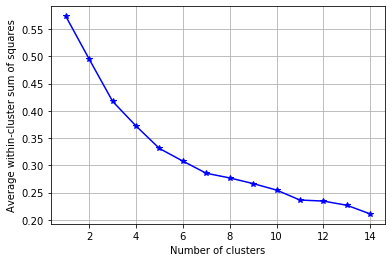

In [44]:
# elbow curve - Avg. within-cluster sum of squares 
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-') 
plt.grid(True) 
plt.xlabel('Number of clusters') 
plt.ylabel('Average within-cluster sum of squares')

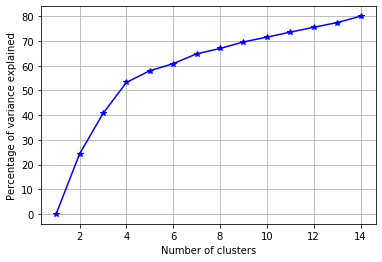

In [45]:
# elbow curve - percentage of variance explained 
fig = plt.figure() 
ax = fig.add_subplot(111) 
ax.plot(K, bss/tss*100, 'b*-') 
plt.grid(True) 
plt.xlabel('Number of clusters') 
plt.ylabel('Percentage of variance explained') 
plt.show()

#7 Cluster Neighborhoods¶

In [46]:
# set number of clusters
kclusters = 14

rj_clustering = rj_grouped.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rj_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 14 Cluster labels :",  kmeans.labels_[0:14])

Check the 14 Cluster labels : [ 8  7  3  2  2  6  6  2  5  6 12  1  4  4]


In [47]:
# add clustering labels
location_venues_sorted.insert(0,'Cluster Labels2',kmeans.labels_)

rj_merged = end

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
rj_merged = rj_merged.join(location_venues_sorted.set_index('Neighborhood'), on='Bairro')

rj_merged.head() # check the last columns!

,Bairro,Latitude,Longitude,Cluster Labels2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Saúde,-22.89651,-43.18440,0.0,Brazilian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
1,Gamboa,-22.89748,-43.19594,8.0,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
2,Santo Cristo,-22.89962,-43.20540,1.0,Restaurant,Brazilian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant
3,Caju,-22.87992,-43.22218,NaN,NaN,NaN,NaN,NaN,NaN
4,Centro,-21.13690,-41.67749,6.0,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant


In [48]:
rj_merged.dropna(inplace=True)

In [49]:
rj_merged

,Bairro,Latitude,Longitude,Cluster Labels2,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Saúde,-22.89651,-43.18440,0.0,Brazilian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
1,Gamboa,-22.89748,-43.19594,8.0,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
2,Santo Cristo,-22.89962,-43.20540,1.0,Restaurant,Brazilian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant
4,Centro,-21.13690,-41.67749,6.0,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
6,Rio Comprido,-22.92562,-43.20947,4.0,Brazilian Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
...,...,...,...,...,...,...,...,...,...
156,Maré,-22.85452,-43.24748,11.0,Brazilian Restaurant,Fast Food Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant
157,Vasco da Gama,-22.89323,-43.22670,4.0,Brazilian Restaurant,Restaurant,Portuguese Restaurant,Vegetarian / Vegan Restaurant,Empanada Restaurant
158,Parque Colúmbia,-22.81360,-43.34080,1.0,Brazilian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
160,Lapa,-22.91055,-43.18438,4.0,Brazilian Restaurant,Restaurant,German Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant


In [50]:
rj_merged['Cluster Labels2'] =rj_merged['Cluster Labels2'].astype(int)

In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rj_merged['Latitude'], rj_merged['Longitude'], rj_merged['Bairro'], rj_merged['Cluster Labels2']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [70]:
# save the map as jpg file
map_clusters.save('map_clusters.jpg')

### 8. Examine Clusters

In [78]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 0, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Saúde,Brazilian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
12,Paquetá,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
18,Cosme Velho,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
21,Urca,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
30,São Conrado,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
34,Maracanã,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
47,Vigário Geral,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
53,Inhaúma,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
57,Rocha,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
87,Oswaldo Cruz,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant


In [79]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 1, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Santo Cristo,Restaurant,Brazilian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant
37,Grajaú,Restaurant,Japanese Restaurant,Sushi Restaurant,Brazilian Restaurant,Empanada Restaurant
39,Bonsucesso,Restaurant,Latin American Restaurant,Brazilian Restaurant,Japanese Restaurant,Jewish Restaurant
68,Piedade,Brazilian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
113,Pavuna,Brazilian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
114,Jacarepaguá,Brazilian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
118,Curicica,Restaurant,Brazilian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant
124,Vila Valqueire,Restaurant,Japanese Restaurant,Sushi Restaurant,Brazilian Restaurant,Fast Food Restaurant
138,Realengo,Seafood Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Empanada Restaurant,Italian Restaurant
139,Padre Miguel,Restaurant,Japanese Restaurant,Fast Food Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant


In [80]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 2, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
20,Humaitá,Italian Restaurant,Vegetarian / Vegan Restaurant,Brazilian Restaurant,Restaurant,Argentinian Restaurant
24,Ipanema,Brazilian Restaurant,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Portuguese Restaurant
27,Jardim Botânico,Brazilian Restaurant,Comfort Food Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
32,Tijuca,Italian Restaurant,Brazilian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant
36,Andaraí,Japanese Restaurant,Brazilian Restaurant,Italian Restaurant,Seafood Restaurant,Restaurant
63,Todos os Santos,Italian Restaurant,Fast Food Restaurant,Southeastern Brazilian Restaurant,Seafood Restaurant,Brazilian Restaurant
64,Cachambi,Japanese Restaurant,Fast Food Restaurant,Italian Restaurant,Brazilian Restaurant,Seafood Restaurant
82,Madureira,Brazilian Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant
85,Rocha Miranda,Italian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
90,Ribeira,Japanese Restaurant,Seafood Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant


In [81]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 3, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
42,Penha,Southeastern Brazilian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
54,Engenho da Rainha,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
84,Turiaçu,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
94,Praia da Bandeira,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
106,Anchieta,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
116,Gardênia Azul,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant
131,Recreio dos Bandeirantes,Fast Food Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
161,Vila Kennedy,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant


In [82]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 4, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Rio Comprido,Brazilian Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
7,Cidade Nova,Brazilian Restaurant,Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant
8,Estácio,Brazilian Restaurant,Restaurant,Italian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant
14,Flamengo,Brazilian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Restaurant,Italian Restaurant
15,Glória,Brazilian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Peruvian Restaurant,Asian Restaurant
17,Catete,Brazilian Restaurant,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Chinese Restaurant
19,Botafogo,Brazilian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Japanese Restaurant
22,Leme,Brazilian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Seafood Restaurant
23,Copacabana,Brazilian Restaurant,Japanese Restaurant,Molecular Gastronomy Restaurant,Tapas Restaurant,French Restaurant
25,Leblon,Brazilian Restaurant,Italian Restaurant,Restaurant,Japanese Restaurant,Thai Restaurant


In [83]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 5, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
103,Galeão,Seafood Restaurant,Brazilian Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
132,Grumari,Seafood Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
144,Senador Vasconcelos,Mexican Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Empanada Restaurant,Italian Restaurant
151,Barra de Guaratiba,Brazilian Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant


In [84]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 6, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Centro,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
46,Parada de Lucas,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
49,Higienópolis,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
61,Lins de Vasconcelos,Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Empanada Restaurant,Italian Restaurant
92,Cacuia,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
96,Bancários,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
107,Parque Anchieta,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
111,Barros Filho,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
117,Cidade de Deus,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant
123,Praça Seca,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant


In [60]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 7, rj_merged.columns[[0] + list(range(5, rj_merged.shape[1]))]]

,Bairro,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
110,Acari,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant,Asian Restaurant


In [85]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 8, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Gamboa,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
59,Sampaio,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
69,Abolição,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
70,Pilares,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
77,Campinho,Fast Food Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant
145,Inhoaíba,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Argentinian Restaurant


In [86]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 9, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,I. de São Cristóvão,American Restaurant,Restaurant,Portuguese Restaurant,Empanada Restaurant,Italian Restaurant
76,Colégio,American Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant


In [87]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 10, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
126,Itanhangá,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant


In [88]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 11, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
40,Ramos,Brazilian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant
52,Del Castilho,Fast Food Restaurant,Brazilian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant
75,Irajá,Brazilian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant
81,Cascadura,Brazilian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant
129,Vargem Pequena,Brazilian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant
156,Maré,Brazilian Restaurant,Fast Food Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant


In [89]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 12, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,Benfica,Asian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Brazilian Restaurant


In [90]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 13, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
43,Penha Circular,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Argentinian Restaurant,Asian Restaurant


In [91]:
rj_merged.loc[rj_merged['Cluster Labels2'] == 14, rj_merged.columns[[0] + list(range(4, rj_merged.shape[1]))]]

,Bairro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
